In [94]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

In [95]:
# Fetch data
training_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
testing_data = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

# Print dataset sizes
print('Train size:', len(training_data.data))
print('Test size:', len(testing_data.data))

Train size: 11314
Test size: 7532


In [96]:
# Labels
print('Labels:', training_data.target_names)

# Label encoding
print('\nLabel encoding:', training_data.target)

# Example article
print('\nExample article:', training_data.data[0])

Labels: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Label encoding: [7 4 4 ... 3 1 8]

Example article: I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


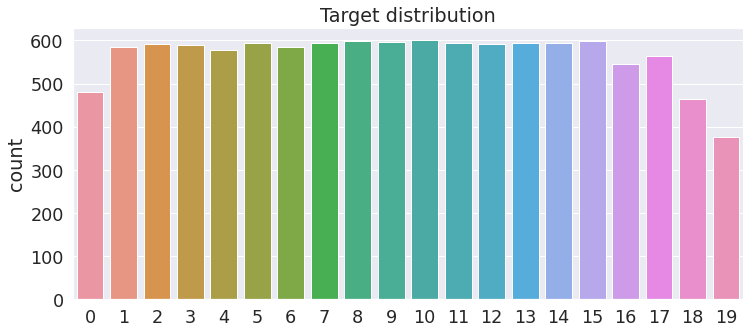

In [97]:
plt.figure(figsize=(12,5))
sns.countplot(training_data.target)
plt.title('Target distribution')
plt.show()

In [98]:
# Load english language model
nlp = spacy.blank('en')

# Define a custom tokenizer using spacy
def custom_tokenizer(doc):
    return [t.text for t in nlp(doc) if not t.is_punct and not t.is_space and t.is_alpha]

In [99]:
def CustomVectorizer(custom_tokenizer,training_data, testing_data):

  vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
  X = vectorizer.fit_transform(training_data.data)
  y = training_data.target

  X_test = vectorizer.transform(testing_data.data)
  y_test = testing_data.target
  return X, y, X_test, y_test
X, y, X_test, y_test = CustomVectorizer(custom_tokenizer,training_data, testing_data)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [100]:
def ConfusionMatrix(X_test, y_test, clf, training_data, test_preds):
  # Figure size
  fig, ax = plt.subplots(figsize=(30, 30))
  ax.grid(False)
  disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, normalize='true', display_labels=training_data.target_names, xticks_rotation='vertical', ax=ax)
  print(classification_report(y_test, test_preds, target_names=training_data.target_names))

Test set F1-score: 0.5751953553873447
                          precision    recall  f1-score   support

             alt.atheism       0.62      0.25      0.35       319
           comp.graphics       0.60      0.61      0.61       389
 comp.os.ms-windows.misc       0.73      0.19      0.30       394
comp.sys.ibm.pc.hardware       0.51      0.70      0.59       392
   comp.sys.mac.hardware       0.75      0.49      0.59       385
          comp.windows.x       0.62      0.80      0.70       395
            misc.forsale       0.89      0.56      0.69       390
               rec.autos       0.81      0.66      0.73       396
         rec.motorcycles       0.89      0.55      0.68       398
      rec.sport.baseball       0.95      0.67      0.79       397
        rec.sport.hockey       0.59      0.86      0.70       399
               sci.crypt       0.49      0.76      0.60       396
         sci.electronics       0.68      0.47      0.55       393
                 sci.med       0.81  

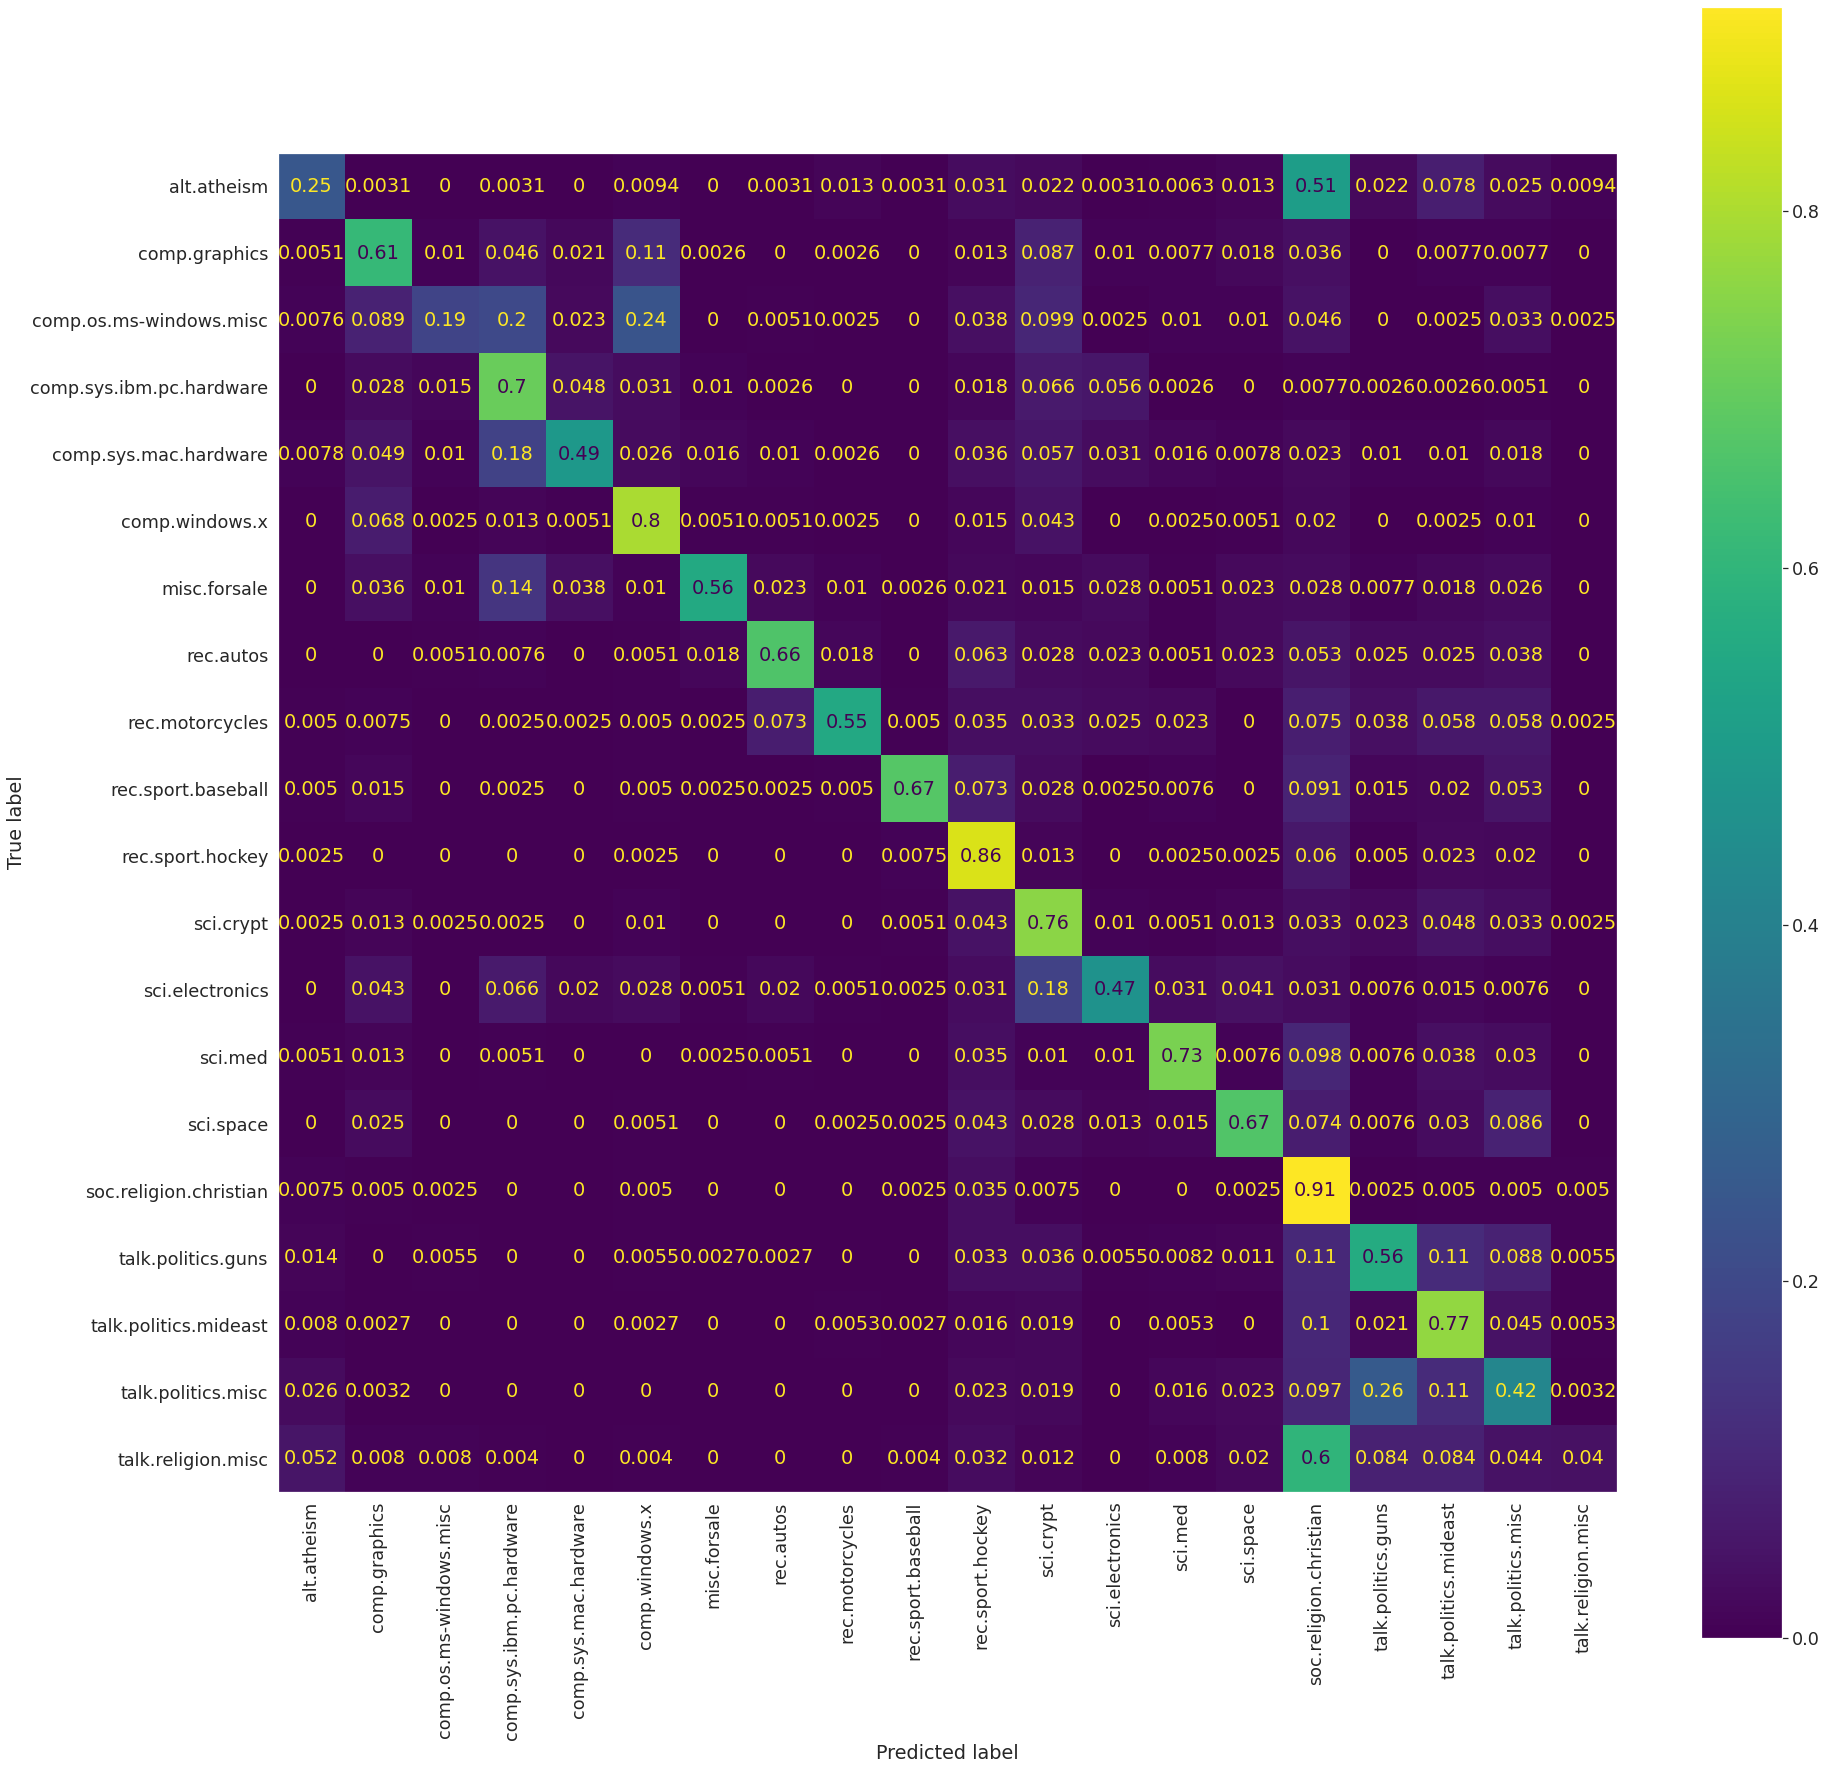

In [101]:
clf = MultinomialNB()


clf.fit(X, y)
test_preds = clf.predict(X_test)

print('Test set F1-score:', f1_score(y_test, test_preds, average='macro'))
ConfusionMatrix(X_test, y_test, clf, training_data, test_preds)

In [102]:
# Load full english language model
nlp = spacy.load('en_core_web_sm')

# Disable named-entity recognition and parsing to save time
unwanted_pipes = ['ner', 'parser']

# Custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if not t.is_punct and not t.is_space and not t.is_stop and t.is_alpha]

In [103]:
X, y, X_test, y_test = CustomVectorizer(custom_tokenizer,training_data, testing_data)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [104]:
# Predict on test set
test_preds = model.predict(X_test)

# Measure f1-score
print('Test set F1-score:', f1_score(y_test, test_preds, average='macro'))

Test set F1-score: 0.6781449437974516


In [106]:
# Space related article
article = ["Nasa satellite is going to survey earth"]

# Vectorize text
X_article = vectorizer.transform(article)

# Predict probability of each class
proba_article = model.predict_proba(X_article)

# Calculate predicted class and confidence
id_max = np.argmax(proba_article)
pred_article = training_data.target_names[id_max]
conf = np.max(proba_article)

# Print predictions
print('Prediction:', pred_article)
print('Confidence:', conf)

Prediction: sci.space
Confidence: 0.9659112038771558
